<a href="https://colab.research.google.com/github/marongkang/MLeveryday/blob/main/MLEveryday12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mnist数据集的读取

In [1]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l

  Cloning https://github.com/d2l-ai/d2l-zh (to revision release) to /tmp/pip-req-build-moeyx61q
  Running command git clone -q https://github.com/d2l-ai/d2l-zh /tmp/pip-req-build-moeyx61q
  Running command git checkout -b release --track origin/release
  Switched to a new branch 'release'
  Branch 'release' set up to track remote branch 'release' from 'origin'.
  Running command git submodule update --init --recursive -q
  Created wheel for d2l: filename=d2l-2.0.0b0-py3-none-any.whl size=80071 sha256=c11c2e2514281303baee8acc30c6528b4f34d4e7a277bc64a99846bdc738f43e
  Stored in directory: /tmp/pip-ephem-wheel-cache-34i3muj1/wheels/73/f4/42/d2b85ca46d85a241d6aa57c1c24027de2d2258202bb67945f9
Successfully built d2l


In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [3]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [4]:
def get_fashion_mnist_labels(labels):  
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [5]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

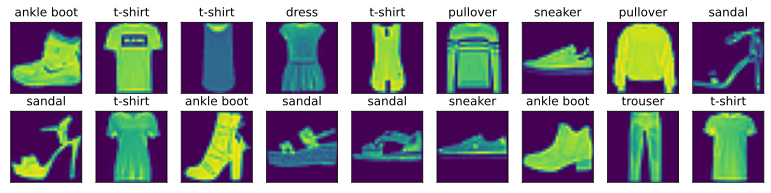

In [6]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [7]:
batch_size=256
def get_dataloader_works():
  return 2

train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_works())
timer=d2l.Timer()
for X,y in train_iter:
  continue
f'{timer.stop():.2f} sec' #f-string,{}内为可替换的内容

'5.22 sec'

#对以上操作进行整合

In [8]:
def load_data_fashion_mnist(batch_size,resize=None):
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,
              num_workers=get_dataloader_works()),
      data.DataLoader(mnist_test,batch_size,shuffle=True,
              num_workers=get_dataloader_works()))

In [9]:
import torch
from IPython import display
from d2l import torch as d2l

In [10]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
num_inputs=784
num_outputs=10

W=torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b=torch.zeros(num_outputs,requires_grad=True)

#softmax的三个步骤
1. 对每一项求幂(exp)
2. 对每一行求和(每个batch是一行),得到规范化常数
3. 每一项除以规范化常数(和的结果为1)

$softmax(X)_{ij}=\frac{e^{X_{ij}}}{∑_ke^{X_{ik}}} $

In [12]:
#定义softmax函数
def softmax(X):
  X_exp=torch.exp(X)
  partition=X_exp.sum(1,keepdims=True)
  return X_exp/partition

In [13]:
#测试一下
x=torch.normal(0,1,(2,6))
x_prob=softmax(x)
print(x_prob,"\n",x_prob.sum(1))

tensor([[0.2198, 0.2886, 0.0512, 0.2438, 0.0850, 0.1116],
        [0.0682, 0.0888, 0.4506, 0.0956, 0.0692, 0.2275]]) 
 tensor([1.0000, 1.0000])


#定义模型
实现softmax回归模型

In [14]:
#使用reshape函数将图片展开为向量(一维)
def net(X):
  return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+b)

#损失函数
这里使用**交叉熵**损失函数

**交叉熵**  
$$ L=\frac{1}{N}∑L_i=-\frac{1}{N}\sum_{i}\sum_{c=1}^{M}y_{ic}log(p_{ic}) $$
where:
* $M:类别数量$
* $y_{ic}:符号函数,如果样本i的真实值等于类别c取1,否则取0$
* $p_{ic}:样本i属于类别c的概率$


In [15]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]
#取y_hat中的[0][0]和[1][2]

tensor([0.1000, 0.5000])

In [16]:
def cross_entropy(y_hat,y):
  return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

#分类精度


In [17]:
def accuracy(y_hat,y):
  if len(y_hat.shape)>1 and y_hat.shape[1]>1:
    y_hat=y_hat.argmax(axis=1)
  cmp=y_hat.type(y.dtype)==y
  return float(cmp.type(y.dtype).sum())

In [18]:
accuracy(y_hat,y)/len(y)

0.5

In [19]:
def evaluate_accuracy(net,data_iter):
  if isinstance(net,torch.nn.Module):
    net.eval()
  metric=Accumulator(2)
  for X,y in data_iter:
    metric.add(accuracy(net(X),y),y.numel())
  return metric[0]/metric[1]

In [20]:
class Accumulator: 
  def __init__(self, n):
    self.data = [0.0] * n

  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]

  def reset(self):
    self.data = [0.0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [21]:
evaluate_accuracy(net,test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.0675

训练一个周期的函数

In [22]:
def train_epoch(net,train_iter,loss,updater): 
#train_iter 训练数据集迭代器,loss 损失函数,updater 对W和b进行更新的函数
  if isinstance(net,torch.nn.Module):
    net.train()
  metric=Accumulator(3)
  for X,y in train_iter:
    y_hat=net(X)
    l=loss(y_hat,y)
    if isinstance(updater,torch.optim.Optimizer):
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
      l.sum().backward()
      updater(X.shape[0])
    metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())
  return metric[0]/metric[2],metric[1]/metric[2]

In [23]:
def train_epoch_ch3(net, train_iter, loss, updater):  #ave
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

#Animator
绘制数据,展示迭代成功

In [24]:
class Animator:
  def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
            ylim=None, xscale='linear', yscale='linear',
            fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
            figsize=(3.5, 2.5)):
    if legend is None:
      legend=[]
    d2l.use_svg_display()
    self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
    if nrows * ncols == 1:
      self.axes = [self.axes, ]
    self.config_axes = lambda: d2l.set_axes(
      self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    self.X, self.Y, self.fmts = None, None, fmts
  
  def add(self, x, y):
    # 向图表中添加多个数据点
    if not hasattr(y, "__len__"):
      y = [y]
    n = len(y)
    if not hasattr(x, "__len__"):
      x = [x] * n
    if not self.X:
      self.X = [[] for _ in range(n)]
    if not self.Y:
      self.Y = [[] for _ in range(n)]
    for i, (a, b) in enumerate(zip(x, y)):
      if a is not None and b is not None:
        self.X[i].append(a)
        self.Y[i].append(b)
    self.axes[0].cla()
    for x, y, fmt in zip(self.X, self.Y, self.fmts):
      self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)

#开始训练

In [28]:
def train(net,train_iter,test_iter,loss,num_epochs,updater):
  animator=Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
            legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics=train_epoch_ch3(net,train_iter,loss,updater)
    test_acc=evaluate_accuracy(net,test_iter)
    animator.add(epoch+1,train_metrics+(test_acc,))
    train_loss,train_acc=train_metrics
    
    #assert train_loss<0.5, train_loss #这里会报错,不太懂 train_loss 要控制在0.5一下的原因
    assert train_acc<=1 and train_acc>0.7, train_acc
    assert test_acc<=1 and test_acc>0.7, test_acc


In [29]:
lr=0.1#learning rate 学习率
def updater(batch_size):
  return d2l.sgd([W,b],lr,batch_size)

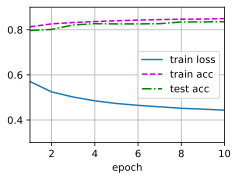

In [30]:
num_epochs=10
train(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


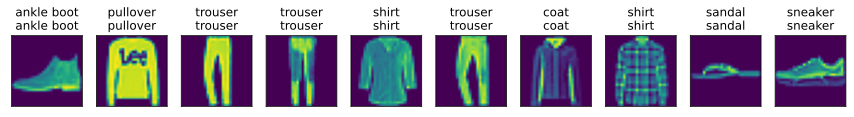

In [31]:
def predict_ch3(net, test_iter, n=6): 
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
  titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter,n=10)

#使用深度学习框架的API实现

In [33]:
from torch import nn

bathch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [35]:
net=nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
  if type(m)==nn.Linear:
    nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [36]:
loss=nn.CrossEntropyLoss(reduction='none')

In [38]:
trainer=torch.optim.SGD(net.parameters(),lr=0.1)

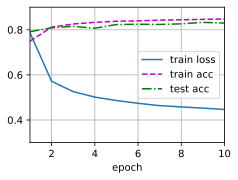

In [40]:
num_epochs=10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)